In [1]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
X_train = pd.read_csv('../data/crop_mapping/preprocessed_train.csv')
X_test = pd.read_csv('../data/crop_mapping/preprocessed_test.csv')

y_train = pd.read_csv('../data/crop_mapping/labels_train.csv')
y_test = pd.read_csv('../data/crop_mapping/labels_test.csv')

In [3]:
y_train.value_counts()

class
6        17015
3        15135
4        14813
5         9423
1         7832
2          720
7          229
Name: count, dtype: int64

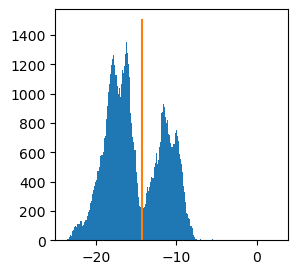

In [4]:
# For the time being we are using a certain segment of the data based on the distribution of sigHH. 
# This segment has univariate feature distributions much closer to Gaussian or log-Gaussian.
threshold = -14.25

plt.figure(figsize=(3,3))
plt.hist(X_train['sigHH'], bins = 200)
plt.plot(threshold*np.ones(50), np.linspace(0, 1500, 50))
plt.show()

In [5]:
y_train.loc[X_train['sigHH'] < threshold].value_counts()

class
6        16510
4        14459
5         8919
3          455
1          238
2           14
Name: count, dtype: int64

In [6]:
X_segment_train = X_train.loc[X_train['sigHH'] < threshold].reset_index(drop=True)
y_selected_train = y_train.loc[X_train['sigHH'] < threshold].reset_index(drop=True)
X_segment_test = X_test.loc[X_train['sigHH'] < threshold].reset_index(drop=True)
y_selected_test = y_test.loc[X_train['sigHH'] < threshold].reset_index(drop=True)

In [7]:
scaler = StandardScaler()
scaler.fit(X_segment_train)
X_segment_train = pd.DataFrame(scaler.transform(X_segment_train), columns=X_segment_train.columns)
X_segment_test = pd.DataFrame(scaler.transform(X_segment_test), columns=X_segment_train.columns)

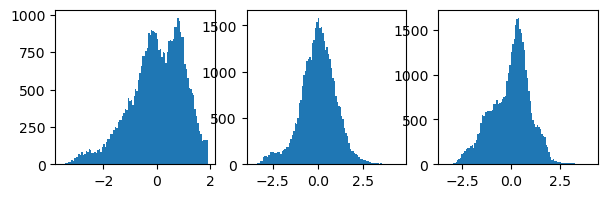

In [8]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_segment_train['sigHH'], bins = 100)
axes[1].hist(X_segment_train['sigHV'], bins = 100)
axes[2].hist(X_segment_train['sigVV'], bins = 100)
plt.show()

In [9]:
# Start collecting new features

X_selected_train = pd.concat([
    X_segment_train['sigHH'].reset_index(drop=True), 
    X_segment_train['sigHV'].reset_index(drop=True), 
    X_segment_train['sigVV'].reset_index(drop=True)
], axis=1)

X_selected_test = pd.concat([
    X_segment_test['sigHH'].reset_index(drop=True), 
    X_segment_test['sigHV'].reset_index(drop=True), 
    X_segment_test['sigVV'].reset_index(drop=True)
], axis=1)

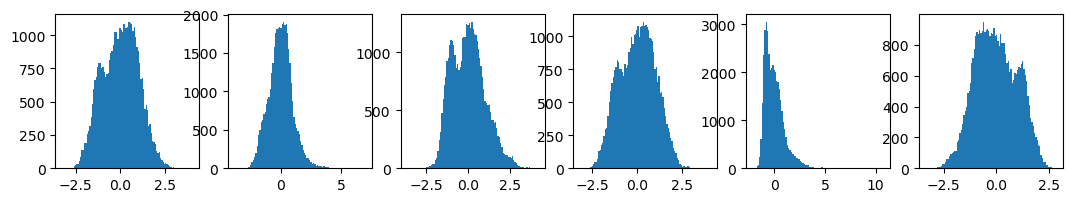

In [10]:
fig, axes = plt.subplots(1,6, figsize=(13,2))
axes[0].hist(X_segment_train['Rhhvv'], bins = 100)
axes[1].hist(X_segment_train['Rhvhh'], bins = 100)
axes[2].hist(X_segment_train['Rhvvv'], bins = 100)
axes[3].hist(X_segment_train['Rhh'], bins = 100)
axes[4].hist(X_segment_train['Rhv'], bins = 100)
axes[5].hist(X_segment_train['Rvv'], bins = 100)
plt.show()

In [11]:
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['Rhhvv'].reset_index(drop=True),
    X_segment_train['Rhvhh'].reset_index(drop=True), 
    X_segment_train['Rhvvv'].reset_index(drop=True),
    X_segment_train['Rhh'].reset_index(drop=True),
    X_segment_train['Rhv'].reset_index(drop=True), 
    X_segment_train['Rvv'].reset_index(drop=True)
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['Rhhvv'].reset_index(drop=True),
    X_segment_test['Rhvhh'].reset_index(drop=True), 
    X_segment_test['Rhvvv'].reset_index(drop=True),
    X_segment_test['Rhh'].reset_index(drop=True),
    X_segment_test['Rhv'].reset_index(drop=True), 
    X_segment_test['Rvv'].reset_index(drop=True)
], axis=1)

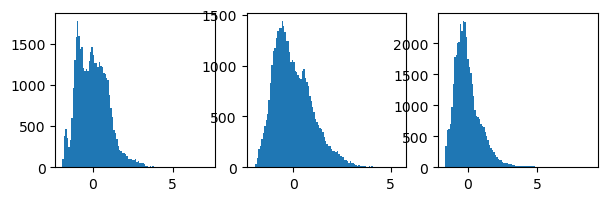

In [12]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_segment_train['l1'], bins = 100)
axes[1].hist(X_segment_train['l2'], bins = 100)
axes[2].hist(X_segment_train['l3'], bins = 100)
plt.show()

In [13]:
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['l1'].reset_index(drop=True),
    X_segment_train['l2'].reset_index(drop=True),
    X_segment_train['l3'].reset_index(drop=True)
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['l1'].reset_index(drop=True),
    X_segment_test['l2'].reset_index(drop=True),
    X_segment_test['l3'].reset_index(drop=True)
], axis=1)

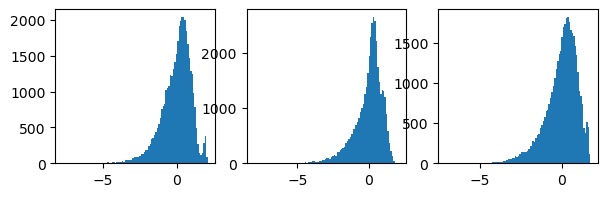

In [14]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_segment_train['Ro12'], bins = 100)
axes[1].hist(X_segment_train['Ro13'], bins = 100)
axes[2].hist(X_segment_train['Ro23'], bins = 100)
plt.show()

In [15]:
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['Ro12'].reset_index(drop=True),
    X_segment_train['Ro13'].reset_index(drop=True),
    X_segment_train['Ro23'].reset_index(drop=True)
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['Ro12'].reset_index(drop=True),
    X_segment_test['Ro13'].reset_index(drop=True),
    X_segment_test['Ro23'].reset_index(drop=True)
], axis=1)

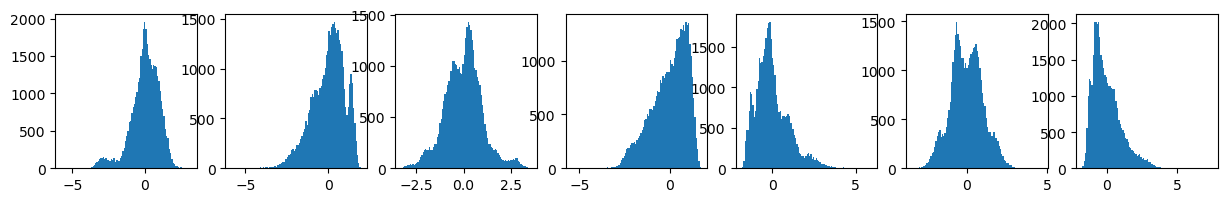

In [16]:
fig, axes = plt.subplots(1,7, figsize=(15,2))
axes[0].hist(X_segment_train['H'], bins = 100)
axes[1].hist(X_segment_train['A'], bins = 100)
axes[2].hist(X_segment_train['a'], bins = 100)
axes[3].hist(X_segment_train['HA'], bins = 100)
axes[4].hist(X_segment_train['H1mA'], bins = 100)
axes[5].hist(X_segment_train['1mHA'], bins = 100)
axes[6].hist(X_segment_train['1mH1mA'], bins = 100)
plt.show()

In [17]:
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['H'].reset_index(drop=True),
    X_segment_train['A'].reset_index(drop=True),
    X_segment_train['a'].reset_index(drop=True),
    X_segment_train['HA'].reset_index(drop=True),
    X_segment_train['H1mA'].reset_index(drop=True),
    X_segment_train['1mHA'].reset_index(drop=True),
    X_segment_train['1mH1mA'].reset_index(drop=True)
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['H'].reset_index(drop=True),
    X_segment_test['A'].reset_index(drop=True),
    X_segment_test['a'].reset_index(drop=True),
    X_segment_test['HA'].reset_index(drop=True),
    X_segment_test['H1mA'].reset_index(drop=True),
    X_segment_test['1mHA'].reset_index(drop=True),
    X_segment_test['1mH1mA'].reset_index(drop=True)
], axis=1)

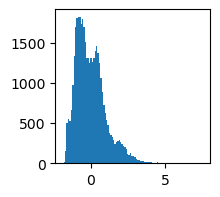

In [18]:
plt.figure(figsize=(2,2))
plt.hist(X_segment_train['PH'], bins=100)
plt.show()

In [19]:
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['PH'].reset_index(drop=True),
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['PH'].reset_index(drop=True),
], axis=1)

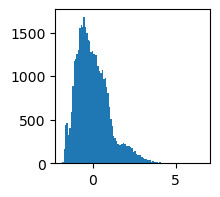

In [20]:
plt.figure(figsize=(2,2))
plt.hist(X_segment_train['rvi'], bins=100)
plt.show()

In [21]:
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['rvi'].reset_index(drop=True),
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['rvi'].reset_index(drop=True),
], axis=1)

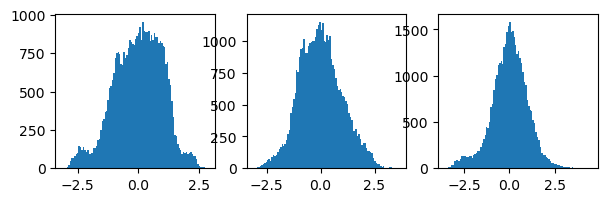

In [22]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_segment_train['paulalpha'], bins = 100)
axes[1].hist(X_segment_train['paulbeta'], bins = 100)
axes[2].hist(X_segment_train['paulgamma'], bins = 100)
plt.show()

In [23]:
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['paulalpha'].reset_index(drop=True),
    X_segment_train['paulbeta'].reset_index(drop=True),
    X_segment_train['paulgamma'].reset_index(drop=True)
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['paulalpha'].reset_index(drop=True),
    X_segment_test['paulbeta'].reset_index(drop=True),
    X_segment_test['paulgamma'].reset_index(drop=True)
], axis=1)

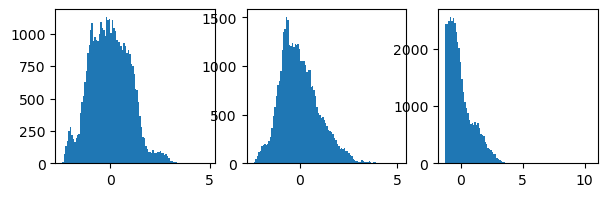

In [24]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_segment_train['krogks'], bins = 100)
axes[1].hist(X_segment_train['krogkd'], bins = 100)
axes[2].hist(X_segment_train['krogkh'], bins = 100)
plt.show()

In [25]:
# E.g. drop krogkh since the selection cannot be transformed to a normal distribution
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['krogks'].reset_index(drop=True),
    X_segment_train['krogkd'].reset_index(drop=True),
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['krogks'].reset_index(drop=True),
    X_segment_test['krogkd'].reset_index(drop=True),
], axis=1)

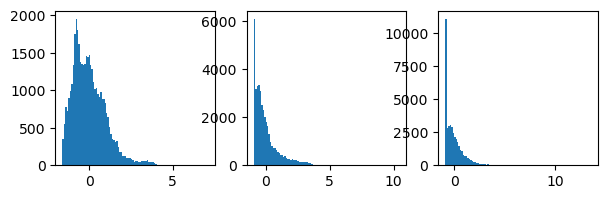

In [26]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_segment_train['freeodd'], bins = 100)
axes[1].hist(X_segment_train['freedbl'], bins = 100)
axes[2].hist(X_segment_train['freevol'], bins = 100)
plt.show()

In [27]:
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['freeodd'].reset_index(drop=True)
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['freeodd'].reset_index(drop=True)
], axis=1)

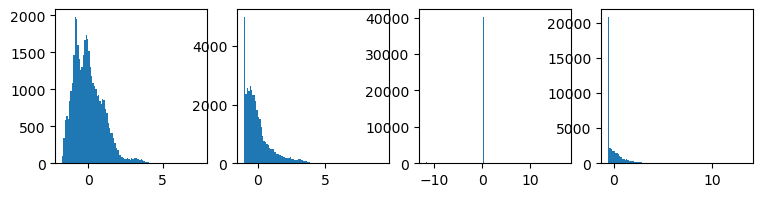

In [28]:
fig, axes = plt.subplots(1,4, figsize=(9,2))
axes[0].hist(X_segment_train['yamodd'], bins = 100)
axes[1].hist(X_segment_train['yamdbl'], bins = 100)
axes[2].hist(X_segment_train['yamhlx'], bins = 100)
axes[3].hist(X_segment_train['yamvol'], bins = 100)
plt.show()

In [29]:
X_selected_train = pd.concat([
    X_selected_train,
    X_segment_train['yamodd'].reset_index(drop=True)
], axis=1)

X_selected_test = pd.concat([
    X_selected_test,
    X_segment_test['yamodd'].reset_index(drop=True)
], axis=1)

In [31]:
X_selected_train.head()

,sigHH,sigHV,sigVV,Rhhvv,Rhvhh,Rhvvv,Rhh,Rhv,Rvv,l1,...,1mH1mA,PH,rvi,paulalpha,paulbeta,paulgamma,krogks,krogkd,freeodd,yamodd
0,-0.608804,0.651989,1.390392,-2.479392,2.170431,-0.555917,-2.530170,0.152813,2.201129,0.764581,...,0.964230,-0.410599,-0.155255,0.265787,1.013722,0.651989,0.083906,0.990221,0.485705,-0.019631
1,1.143953,1.987050,2.638113,-1.816295,1.962025,-0.174894,-1.929361,0.436912,1.603679,3.749114,...,2.098903,-0.689710,-0.344290,1.368205,2.673125,1.987050,1.418365,3.273421,-0.817779,0.248383
2,1.768223,2.461937,3.520023,-2.118858,1.886644,-0.455181,-2.196403,0.169419,1.902151,5.356972,...,1.276758,0.064037,0.386173,2.784760,2.781551,2.461937,3.375473,3.488706,4.504039,4.005937
3,-0.449879,-0.569420,-0.898263,0.542212,-0.372923,0.185040,0.609324,-0.125499,-0.509245,-1.056879,...,-0.796731,0.907150,0.463647,-1.301954,0.086877,-0.569420,-1.270996,-0.004952,-1.173372,-1.324884
4,0.954157,2.001197,2.954995,-2.445342,2.283236,-0.459056,-2.508452,0.267762,2.155025,4.035390,...,2.065117,-0.548347,-0.185802,1.910591,2.439213,2.001197,2.156283,3.009523,3.675272,2.748017


In [32]:
# Define a node structure grouping the transformed features
node_structure = {
    'sig': ['sigHH', 'sigHV', 'sigVV'],
    'R': ['Rhhvv', 'Rhvhh', 'Rhvvv', 'Rhh', 'Rhv', 'Rvv'],
    'Ro': ['Ro12', 'Ro13', 'Ro23'],
    'L': ['l1', 'l2', 'l3'],
    'HA': ['H', 'A', 'a', 'HA', 'H1mA', '1mHA', '1mH1mA'],
    'PH': ['PH'],
    'rvi': ['rvi'],
    'paul': ['paulalpha', 'paulbeta', 'paulgamma'],
    'krog': ['krogks', 'krogkd'],
    'free': ['freeodd'],
    'yam': ['yamodd']
}

In [33]:
with open('../data/crop_mapping/node_structure.json', 'w') as file:
    json.dump(node_structure, file)

X_selected_train.to_csv('../data/crop_mapping/selection_features_train.csv', mode="w", index=False)
X_selected_test.to_csv('../data/crop_mapping/selection_features_test.csv', mode="w", index=False)
y_selected_train.to_csv('../data/crop_mapping/selection_labels_train.csv', mode="w", index=False)
y_selected_test.to_csv('../data/crop_mapping/selection_labels_test.csv', mode="w", index=False)